The dataset has been shared by a spotify user. I found it in Kaggle. 

The user has created 2 playlists on Spotify. Both contain around 1000 songs. One with songs, he likes and the other with songs he doesn't like. 

He made sure to vary the styles of music in the 2 playlists. 

Objectif : If, as he indicates, his musical tastes are eclectic, the data set therefore seems interesting for studying the prediction that a song might like him by studying the criteria of the songs.

# Import librairies

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
%matplotlib inline

# Manipulating Dataset

In [141]:
url='/Users/tatiana/Spotify_pred/data/data.csv'#1 csv file with all songs

In [142]:
df=pd.read_csv(url)
df.head(15)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


The column "Unamed 0" is an index column. We can drop it.

In [143]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


"Unamed 0" has correctly been drop it.

In [144]:
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


## Shape of dataset

In [145]:
df.shape

(2017, 16)

The dataset is composed with 16 columns and 2017 rows

## List of columns

In [146]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

Each row of those columns descibes a song : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence',

## Dtype of columns

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

The following columns are ordinals columns : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence', 'target'
    

The columns song_title and artist won't be usefull to make our prediction we can drop it.

## Drop song_title and artist

In [148]:
df.drop(['song_title', 'artist'], axis=1,inplace=True)

In [149]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


## New shape

In [150]:
df.shape

(2017, 14)

## Missing values

In [151]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

There are no missing values

In [152]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


The values in duration _ms are between 10^4 and 10^6 so it may be better to transform in minutes.
The min and 1rst quartile is 0 for instrumentalness column and mode column is 0. 
It happens for instrumentalness when the song is vocals like in rap. So it is not an issue.
In mode columns we have the modality, major is 1 and minor is 0. So once again, it's not an issue.

# Visualization

## Correlation

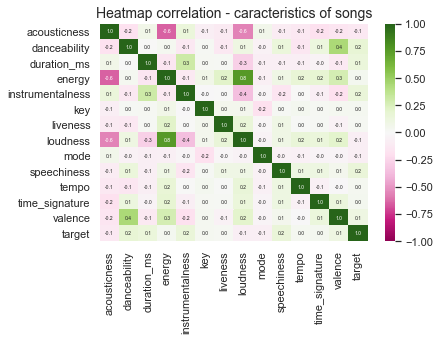

In [153]:
plt.title("Heatmap correlation - caracteristics of songs", fontsize =14,loc='center')
heatmap_reg = sns.heatmap(df.corr(), cmap="PiYG", robust=True,annot=True,annot_kws={'size':5},fmt=".1f",vmin=-1, vmax=1)
square=True

We don't notice high correlation between our target and the caracteristics of the song.
We don't notice high correlation between the caracteristics of the song between them. We can conclude that there is no multicollinearity.

There are 13 features in the data set.
One target is like (1) or don't like the song (0)

## Histogram

<AxesSubplot:>

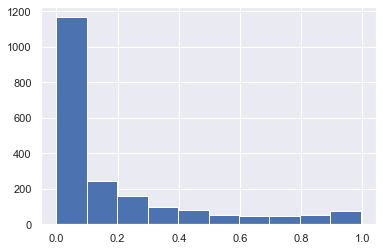

In [154]:
df['acousticness'].hist()

<AxesSubplot:>

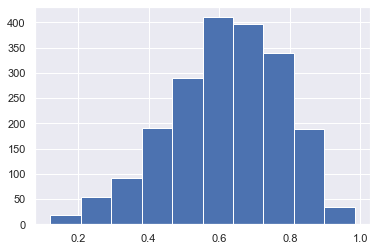

In [155]:
df['danceability'].hist()

<AxesSubplot:>

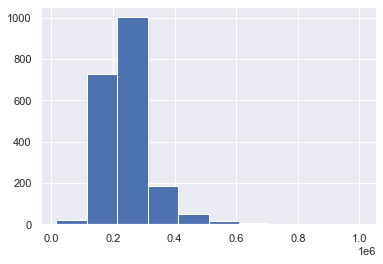

In [156]:
df['duration_ms'].hist()

<AxesSubplot:>

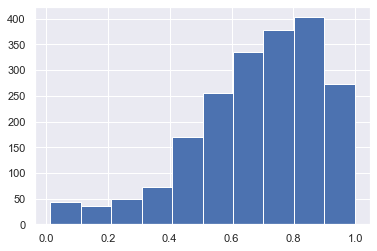

In [157]:
df['energy'].hist()

<AxesSubplot:>

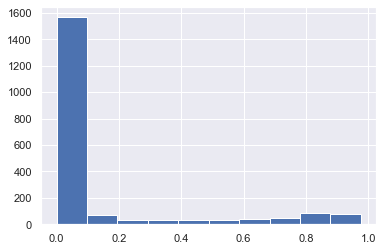

In [158]:
df['instrumentalness'].hist()

<AxesSubplot:>

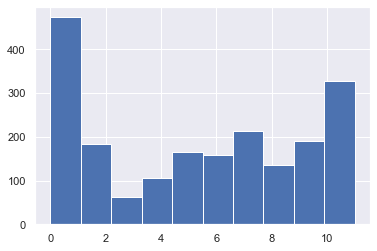

In [159]:
df['key'].hist()

<AxesSubplot:>

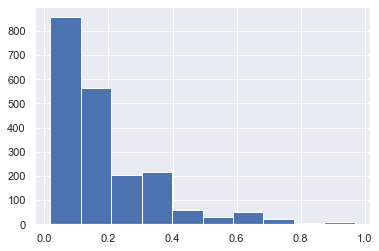

In [160]:
df['liveness'].hist()

<AxesSubplot:>

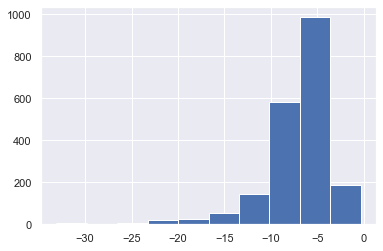

In [161]:
df['loudness'].hist()

<AxesSubplot:>

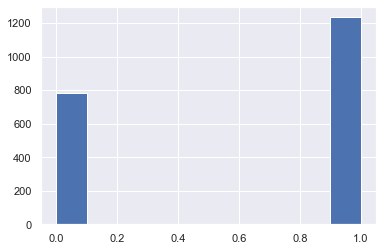

In [162]:
df['mode'].hist()

<AxesSubplot:>

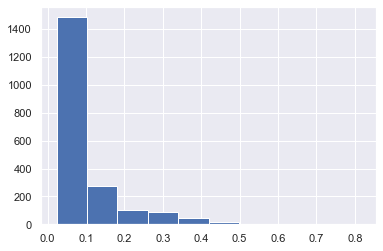

In [163]:
df['speechiness'].hist()

<AxesSubplot:>

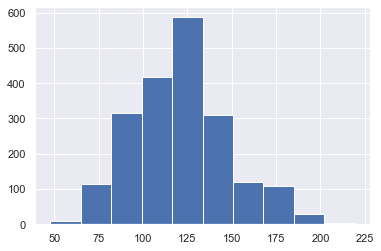

In [164]:
df['tempo'].hist()

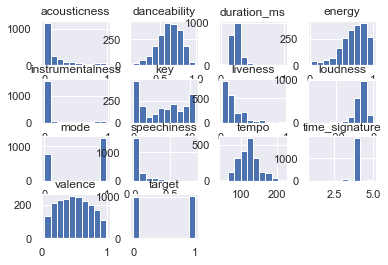

In [165]:
df.hist()
plt.show()

All the features do not more or less look like standard normally distributed data.

# Modelling

There are only 13 features for the modelling. To begin, I don't use FILTERS, WRAPERS or EMBEDDED methods

## Import scikit learn librairies

In [166]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Split the data set one for train and the other for the test

As the values of my features are dispersed, I take a large amount of data to make the prediction : 90% so I leave 10% of the dataset to make the prediction.

In [168]:
X_train, X_test,y_train,y_test = train_test_split(df.drop('target',axis=1), \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

In [ ]:
Acu

## Decision Tree

In [169]:
model1=DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)

print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[69, 31],
       [32, 70]])

Accuracy 0.6881188118811881
Recall 0.6862745098039216
Precision 0.693069306930693
F1 0.6896551724137931


## Random Forest

For the random forest we need to normalize the values in the columns

In [170]:
model1=RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[76, 24],
       [25, 77]])

Accuracy 0.7574257425742574
Recall 0.7549019607843137
Precision 0.7623762376237624
F1 0.7586206896551724


## Random Forest balanced

In [172]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[76, 24],
       [29, 73]])

Accuracy 0.7376237623762376
Recall 0.7156862745098039
Precision 0.7525773195876289
F1 0.7336683417085427


## XGBoost

In [ ]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

## AdaBoost

In [174]:
model1=AdaBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[74, 26],
       [29, 73]])

Accuracy 0.7277227722772277
Recall 0.7156862745098039
Precision 0.7373737373737373
F1 0.72636815920398


## CatBoost

In [176]:
model1=CatBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, [eval(i) for i in y_pred1])
acc1=accuracy_score(y_test, [eval(i) for i in y_pred1])
rec1=recall_score(y_test, [eval(i) for i in y_pred1])
pre1=precision_score(y_test, [eval(i) for i in y_pred1])
f11=f1_score(y_test, [eval(i) for i in y_pred1])
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

Learning rate set to 0.013288
0:	learn: 0.6892559	total: 55ms	remaining: 55s
1:	learn: 0.6856370	total: 57.2ms	remaining: 28.5s
2:	learn: 0.6824485	total: 59.2ms	remaining: 19.7s
3:	learn: 0.6782847	total: 61.4ms	remaining: 15.3s
4:	learn: 0.6743167	total: 63.6ms	remaining: 12.7s
5:	learn: 0.6703219	total: 65.8ms	remaining: 10.9s
6:	learn: 0.6661944	total: 69ms	remaining: 9.79s
7:	learn: 0.6628036	total: 72.2ms	remaining: 8.95s
8:	learn: 0.6593437	total: 75ms	remaining: 8.26s
9:	learn: 0.6563868	total: 77.8ms	remaining: 7.71s
10:	learn: 0.6533243	total: 80.8ms	remaining: 7.26s
11:	learn: 0.6496453	total: 83.7ms	remaining: 6.89s
12:	learn: 0.6464522	total: 86.9ms	remaining: 6.59s
13:	learn: 0.6431615	total: 89.1ms	remaining: 6.27s
14:	learn: 0.6403264	total: 93.4ms	remaining: 6.13s
15:	learn: 0.6372620	total: 99.3ms	remaining: 6.11s
16:	learn: 0.6343104	total: 103ms	remaining: 5.93s
17:	learn: 0.6316488	total: 105ms	remaining: 5.74s
18:	learn: 0.6293430	total: 108ms	remaining: 5.59s
19:

168:	learn: 0.4549019	total: 752ms	remaining: 3.7s
169:	learn: 0.4540511	total: 755ms	remaining: 3.69s
170:	learn: 0.4533736	total: 760ms	remaining: 3.68s
171:	learn: 0.4527654	total: 763ms	remaining: 3.67s
172:	learn: 0.4522763	total: 769ms	remaining: 3.68s
173:	learn: 0.4516935	total: 774ms	remaining: 3.67s
174:	learn: 0.4516480	total: 777ms	remaining: 3.66s
175:	learn: 0.4510893	total: 782ms	remaining: 3.66s
176:	learn: 0.4505127	total: 786ms	remaining: 3.65s
177:	learn: 0.4499231	total: 791ms	remaining: 3.65s
178:	learn: 0.4495610	total: 796ms	remaining: 3.65s
179:	learn: 0.4490274	total: 800ms	remaining: 3.65s
180:	learn: 0.4483611	total: 804ms	remaining: 3.64s
181:	learn: 0.4479275	total: 807ms	remaining: 3.63s
182:	learn: 0.4474647	total: 810ms	remaining: 3.62s
183:	learn: 0.4470607	total: 815ms	remaining: 3.61s
184:	learn: 0.4465214	total: 818ms	remaining: 3.6s
185:	learn: 0.4460546	total: 822ms	remaining: 3.6s
186:	learn: 0.4454121	total: 825ms	remaining: 3.59s
187:	learn: 0.4

331:	learn: 0.3834891	total: 1.5s	remaining: 3.01s
332:	learn: 0.3830826	total: 1.5s	remaining: 3.01s
333:	learn: 0.3827738	total: 1.51s	remaining: 3.01s
334:	learn: 0.3824981	total: 1.51s	remaining: 3s
335:	learn: 0.3822372	total: 1.52s	remaining: 3s
336:	learn: 0.3819201	total: 1.52s	remaining: 2.99s
337:	learn: 0.3815798	total: 1.53s	remaining: 2.99s
338:	learn: 0.3811168	total: 1.53s	remaining: 2.98s
339:	learn: 0.3808814	total: 1.54s	remaining: 2.98s
340:	learn: 0.3806344	total: 1.54s	remaining: 2.98s
341:	learn: 0.3803188	total: 1.55s	remaining: 2.98s
342:	learn: 0.3800379	total: 1.55s	remaining: 2.97s
343:	learn: 0.3796877	total: 1.55s	remaining: 2.96s
344:	learn: 0.3795386	total: 1.56s	remaining: 2.96s
345:	learn: 0.3792193	total: 1.56s	remaining: 2.95s
346:	learn: 0.3788641	total: 1.56s	remaining: 2.95s
347:	learn: 0.3786377	total: 1.57s	remaining: 2.94s
348:	learn: 0.3782339	total: 1.57s	remaining: 2.94s
349:	learn: 0.3777852	total: 1.58s	remaining: 2.93s
350:	learn: 0.377485

511:	learn: 0.3301808	total: 2.25s	remaining: 2.14s
512:	learn: 0.3300433	total: 2.25s	remaining: 2.14s
513:	learn: 0.3298191	total: 2.26s	remaining: 2.13s
514:	learn: 0.3296222	total: 2.26s	remaining: 2.13s
515:	learn: 0.3294761	total: 2.27s	remaining: 2.13s
516:	learn: 0.3292629	total: 2.27s	remaining: 2.13s
517:	learn: 0.3289993	total: 2.28s	remaining: 2.12s
518:	learn: 0.3287311	total: 2.29s	remaining: 2.12s
519:	learn: 0.3285649	total: 2.29s	remaining: 2.12s
520:	learn: 0.3283270	total: 2.3s	remaining: 2.11s
521:	learn: 0.3279603	total: 2.3s	remaining: 2.11s
522:	learn: 0.3277386	total: 2.31s	remaining: 2.1s
523:	learn: 0.3274780	total: 2.31s	remaining: 2.1s
524:	learn: 0.3273226	total: 2.31s	remaining: 2.09s
525:	learn: 0.3270049	total: 2.32s	remaining: 2.09s
526:	learn: 0.3266639	total: 2.32s	remaining: 2.08s
527:	learn: 0.3264759	total: 2.33s	remaining: 2.08s
528:	learn: 0.3260797	total: 2.33s	remaining: 2.08s
529:	learn: 0.3258923	total: 2.33s	remaining: 2.07s
530:	learn: 0.32

685:	learn: 0.2849339	total: 3.19s	remaining: 1.46s
686:	learn: 0.2846620	total: 3.19s	remaining: 1.46s
687:	learn: 0.2844560	total: 3.2s	remaining: 1.45s
688:	learn: 0.2843212	total: 3.2s	remaining: 1.44s
689:	learn: 0.2841490	total: 3.21s	remaining: 1.44s
690:	learn: 0.2839707	total: 3.21s	remaining: 1.44s
691:	learn: 0.2838349	total: 3.21s	remaining: 1.43s
692:	learn: 0.2836654	total: 3.22s	remaining: 1.43s
693:	learn: 0.2834506	total: 3.22s	remaining: 1.42s
694:	learn: 0.2831488	total: 3.23s	remaining: 1.42s
695:	learn: 0.2829642	total: 3.23s	remaining: 1.41s
696:	learn: 0.2826876	total: 3.23s	remaining: 1.41s
697:	learn: 0.2824598	total: 3.24s	remaining: 1.4s
698:	learn: 0.2823403	total: 3.24s	remaining: 1.4s
699:	learn: 0.2820157	total: 3.24s	remaining: 1.39s
700:	learn: 0.2816916	total: 3.25s	remaining: 1.39s
701:	learn: 0.2815786	total: 3.25s	remaining: 1.38s
702:	learn: 0.2813582	total: 3.25s	remaining: 1.37s
703:	learn: 0.2811570	total: 3.26s	remaining: 1.37s
704:	learn: 0.28

858:	learn: 0.2463361	total: 3.93s	remaining: 645ms
859:	learn: 0.2461283	total: 3.94s	remaining: 641ms
860:	learn: 0.2458522	total: 3.94s	remaining: 636ms
861:	learn: 0.2456917	total: 3.94s	remaining: 631ms
862:	learn: 0.2455485	total: 3.94s	remaining: 626ms
863:	learn: 0.2453425	total: 3.95s	remaining: 622ms
864:	learn: 0.2451724	total: 3.95s	remaining: 617ms
865:	learn: 0.2450709	total: 3.96s	remaining: 612ms
866:	learn: 0.2448223	total: 3.96s	remaining: 607ms
867:	learn: 0.2446086	total: 3.96s	remaining: 603ms
868:	learn: 0.2443513	total: 3.97s	remaining: 598ms
869:	learn: 0.2441783	total: 3.97s	remaining: 593ms
870:	learn: 0.2439706	total: 3.98s	remaining: 589ms
871:	learn: 0.2437433	total: 3.98s	remaining: 585ms
872:	learn: 0.2435447	total: 3.99s	remaining: 580ms
873:	learn: 0.2433652	total: 3.99s	remaining: 576ms
874:	learn: 0.2430704	total: 4s	remaining: 571ms
875:	learn: 0.2429024	total: 4s	remaining: 567ms
876:	learn: 0.2426073	total: 4.01s	remaining: 563ms
877:	learn: 0.2424

ValueError: source code string cannot contain null bytes

## KNeighborsClassifier

In [179]:
knn=KNeighborsClassifier(9)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
display(confusion_matrix(y_pred1, y_test))
display(accuracy_score(y_pred1, y_test))

array([[48, 42],
       [52, 60]])

0.5346534653465347

## LogisticRegression

In [180]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)
display(confusion_matrix(y_pred2, y_test))
display(accuracy_score(y_pred2, y_test))

array([[  0,   0],
       [100, 102]])

0.504950495049505

## SVC

In [181]:
sv=SVC()
sv.fit(X_train, y_train)
y_pred3=sv.predict(X_test)
display(confusion_matrix(y_pred3, y_test))
display(accuracy_score(y_pred3, y_test))

array([[92, 81],
       [ 8, 21]])

0.5594059405940595

## Gaussian

In [182]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred4=nb.predict(X_test)
display(confusion_matrix(y_pred4, y_test))
display(accuracy_score(y_pred4, y_test))

array([[70, 47],
       [30, 55]])

0.6188118811881188